<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data-Fetching" data-toc-modified-id="Data-Fetching-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Fetching</a></span></li><li><span><a href="#Data-Scrubbing" data-toc-modified-id="Data-Scrubbing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Scrubbing</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#CNN-Building" data-toc-modified-id="CNN-Building-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CNN Building</a></span><ul class="toc-item"><li><span><a href="#Data-selection" data-toc-modified-id="Data-selection-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data selection</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-dimensionality" data-toc-modified-id="Data-dimensionality-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Data dimensionality</a></span></li><li><span><a href="#Data-normalization" data-toc-modified-id="Data-normalization-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Data normalization</a></span></li></ul></li></ul></li><li><span><a href="#Processed-data-export" data-toc-modified-id="Processed-data-export-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Processed data export</a></span><ul class="toc-item"><li><span><a href="#Data-Splitting" data-toc-modified-id="Data-Splitting-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Data Splitting</a></span></li><li><span><a href="#Model-Instantiation" data-toc-modified-id="Model-Instantiation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model Instantiation</a></span><ul class="toc-item"><li><span><a href="#Building" data-toc-modified-id="Building-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Building</a></span></li><li><span><a href="#Compilation" data-toc-modified-id="Compilation-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Compilation</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Training</a></span></li></ul></li><li><span><a href="#Performance" data-toc-modified-id="Performance-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Performance</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Learning-curves" data-toc-modified-id="Learning-curves-6.3.0.1"><span class="toc-item-num">6.3.0.1&nbsp;&nbsp;</span>Learning curves</a></span></li><li><span><a href="#Correlation-matrix" data-toc-modified-id="Correlation-matrix-6.3.0.2"><span class="toc-item-num">6.3.0.2&nbsp;&nbsp;</span>Correlation matrix</a></span></li><li><span><a href="#Errors-plot" data-toc-modified-id="Errors-plot-6.3.0.3"><span class="toc-item-num">6.3.0.3&nbsp;&nbsp;</span>Errors plot</a></span></li></ul></li></ul></li><li><span><a href="#Intermediate-layers-understanding" data-toc-modified-id="Intermediate-layers-understanding-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Intermediate layers understanding</a></span></li></ul></li><li><span><a href="#Tuning" data-toc-modified-id="Tuning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Tuning</a></span></li><li><span><a href="#Model-saving" data-toc-modified-id="Model-saving-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model saving</a></span></li><li><span><a href="#Model-testing-demo" data-toc-modified-id="Model-testing-demo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model testing demo</a></span></li></ul></div>

# Libraries

In [60]:
import os
from IPython.display import SVG

# visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13,8)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# preprocessing
from sklearn.model_selection import train_test_split

# models
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input ,Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping

from keras.models import load_model

# pipeline
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.base import TransformerMixin, BaseEstimator
# from sklearn import set_config; set_config(display='diagram')

# evaluation metrics
from sklearn.metrics import confusion_matrix

# tuning


# generalization


# deployment
import gradio as gr

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Fetching

In [63]:
train_csv_path = os.path.join('../data/train/raw/data.csv')

In [64]:
df = pd.read_csv(train_csv_path)

# Data Scrubbing

In [65]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


----------------------

# Data cleaning

No clean needed.

---------------

# CNN Building

## Data selection

In [66]:
# split dataset into features/label sets
X = df.drop("label", axis=1)
y = df.label

-------------------------------

## Data preprocessing

### Data dimensionality

In [39]:
# add 3d dimension for image plot
X = np.expand_dims(X, axis=+2)

In [40]:
# reshape images (28x28) for model instantiation
X = X.reshape(-1, 28,28, 1)

### Data normalization

Each pixel values lies between [0,255]. This value range is too high and it will be difficult for any model to learn. The best approach is **normalize** the data. In this case, as the pixel value is in the known range it sufficient to **scale the pixel values** in range [0,1] by simply dividing the array by **255**.

In [67]:
# normalizing pixels to convert into digit image
X = X/255.0

-------------------------------

# Processed data export

In [68]:
# join features & label df for export
df_prcd = X.join(y)

In [69]:
# export processed data for modeling
df_prcd.to_csv('../data/train/processed/data_norm.csv')

---------------------------------------

## Data Splitting

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

------------------------------------

## Model Instantiation

In [43]:
# model instantiation
model = Sequential()

### Building

In [44]:
# input layer modeling
model.add(Input((28,28,1)))

# 8 3x3 kernels
model.add(Conv2D(128, (3, 3), activation='relu'))
# reduce image dimension taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# dropout to avoid over-fitting
model.add(Dropout(0.35))
# 16 3x3 kernels
model.add(Conv2D(16, (3, 3), activation='relu'))
# reduce image dimension taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# dropout to avoid over-fitting
model.add(Dropout(0.35))
# flatten results to one dimension for passing into our final layer
model.add(Flatten())
# define FC Layer (fully connected layer)
model.add(Dense(128, activation='relu'))
# final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        18448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 16)         

### Compilation

In [46]:
# model compilation for multi-classification problem
initial_lr = 0.001 ## define loss function optimizer learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=initial_lr),
              metrics=['accuracy'])

### Training

In [114]:
# define early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')

In [48]:
# model fit
history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    batch_size=64,
                    epochs=8,
                    verbose=1)

Epoch 1/8
308/308 [==============================] - 60s 184ms/step - loss: 0.4680 - accuracy: 0.8498 - val_loss: 0.1519 - val_accuracy: 0.9565
Epoch 2/8
308/308 [==============================] - 62s 201ms/step - loss: 0.1649 - accuracy: 0.9493 - val_loss: 0.0974 - val_accuracy: 0.9729
Epoch 3/8
308/308 [==============================] - 88s 285ms/step - loss: 0.1233 - accuracy: 0.9624 - val_loss: 0.0864 - val_accuracy: 0.9744
Epoch 4/8
308/308 [==============================] - 66s 213ms/step - loss: 0.0994 - accuracy: 0.9688 - val_loss: 0.0688 - val_accuracy: 0.9790
Epoch 5/8
308/308 [==============================] - 56s 180ms/step - loss: 0.0850 - accuracy: 0.9714 - val_loss: 0.0609 - val_accuracy: 0.9822
Epoch 6/8
308/308 [==============================] - 56s 182ms/step - loss: 0.0759 - accuracy: 0.9754 - val_loss: 0.0507 - val_accuracy: 0.9861
Epoch 7/8
308/308 [==============================] - 56s 183ms/step - loss: 0.0699 - accuracy: 0.9773 - val_loss: 0.0588 - val_accuracy:

------------------

## Performance

#### Learning curves

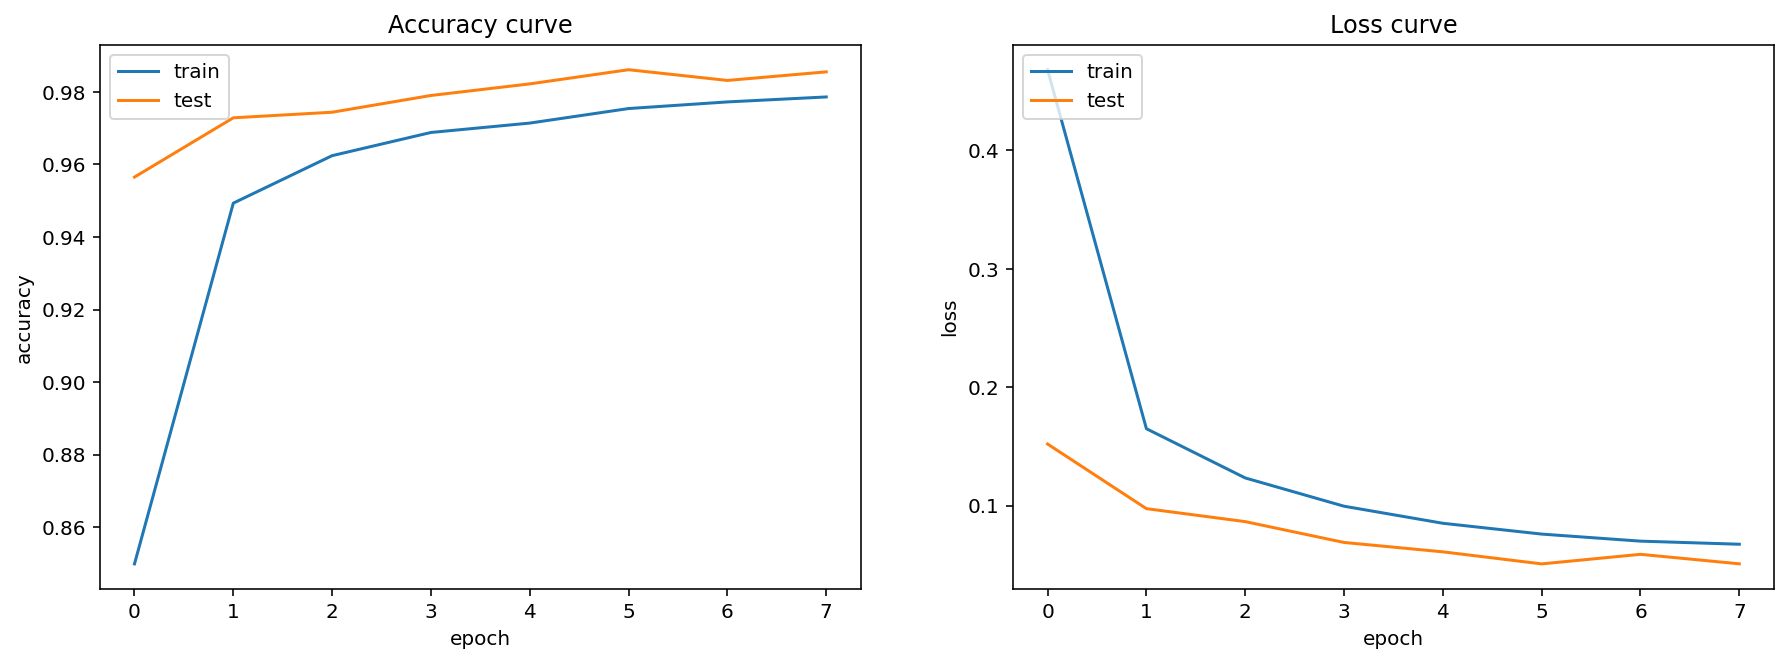

In [49]:
# define figure
f = plt.figure(figsize=(15,5))

# summarize history for accuracy score
f.add_subplot(121) ## accuracy subplot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
f.add_subplot(122) ## loss subplot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# plot / save figures
plt.savefig("../reports/figures/model/learning_curves.png")
plt.show()

#### Correlation matrix

In [50]:
# predict values
y_pred = model.predict(X_test)

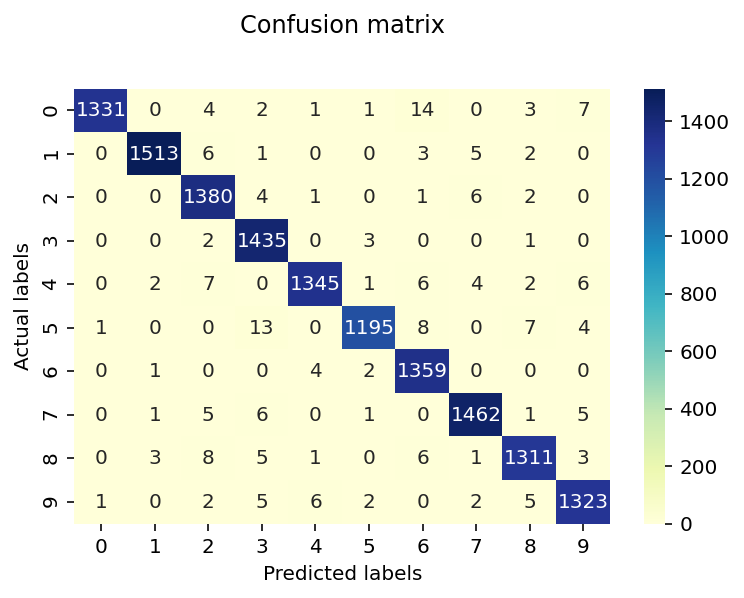

In [51]:
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_pred, y_test)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')

# plot / save figures
plt.savefig("../reports/figures/model/confusion_matrix.png")
plt.show()

#### Errors plot

In [ ]:
# # plot failed image recognition digit compared w/ validation set
# rows = 4
# cols = 9
#
# f = plt.figure(figsize=(2*cols,2*rows))
# sub_plot = 1
# for i in range(X_test.shape[0]):
#     if y_test[i]!=y_pred[i]:
#         f.add_subplot(rows,cols,sub_plot)
#         sub_plot+=1
#         plt.imshow(X_test[i].reshape([28,28]),cmap="Blues")
#         plt.axis("off")
#         plt.title("T: "+str(y_test[i])+" P:"+str(y_pred[i]), y=-0.15,color="Red")
# # plt.savefig("error_plots.png")
# plt.show()

## Intermediate layers understanding

In [52]:
# extract outputs of all layers except Flatten and Dense layers
output_layers = [layer.output for layer in model.layers[:-3]]
# define model returning outputs, given model inputs
activation_model = Model(inputs=model.input, outputs=output_layers)

In [53]:
# define function to plot all hidden activation layers processed image
def plot_layer(layer, i, layer_name = None):
    rows = layer.shape[-1]/16
    cols = 16

    f = plt.figure(figsize=(cols,rows))
    # plt.imshow(first_activation_layer[0,:,:,:].reshape([14*4,14*16]),cmap="Blues")
    for i in range(layer.shape[-1]):
        f.add_subplot(rows,cols,i+1)
        plt.imshow(layer[0,:,:,i].reshape([layer.shape[2],layer.shape[2]]), cmap="Blues")
        plt.axis("off")
    f.suptitle(layer_name, fontsize=14)
    plt.savefig("../reports/figures/model/intermediate_layers" + str(i)+ ".png")
    plt.show()

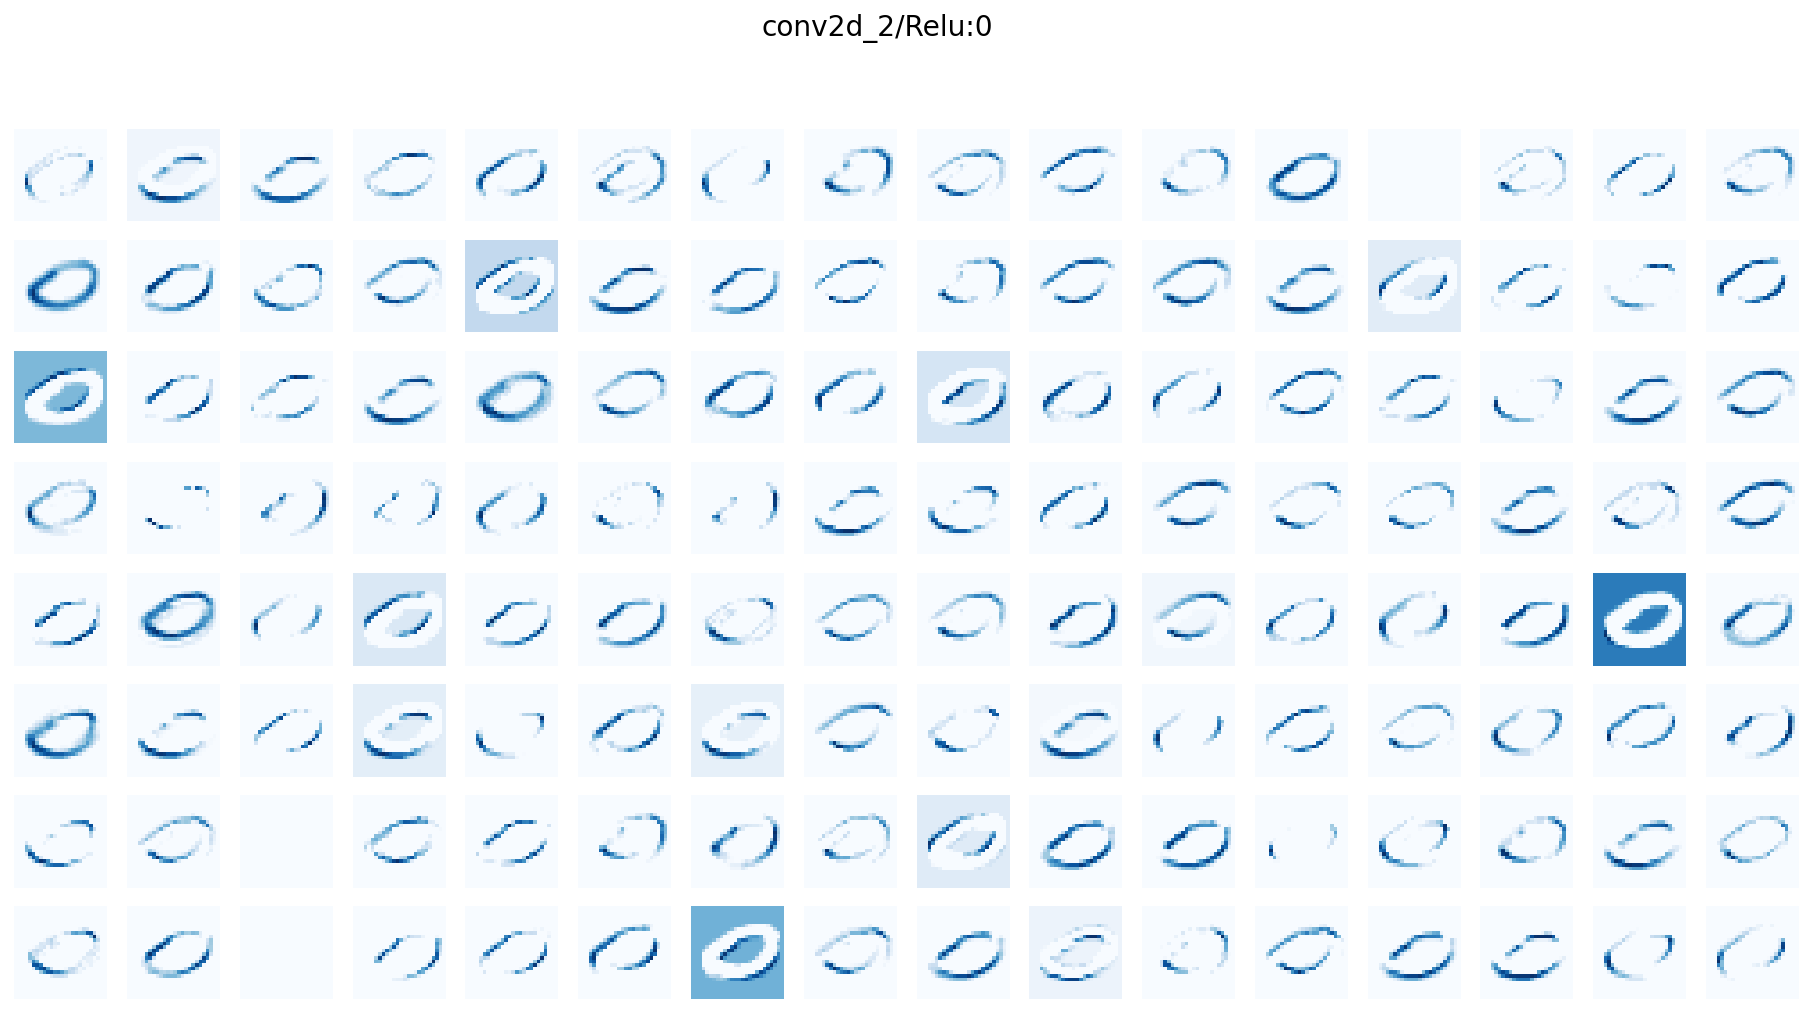

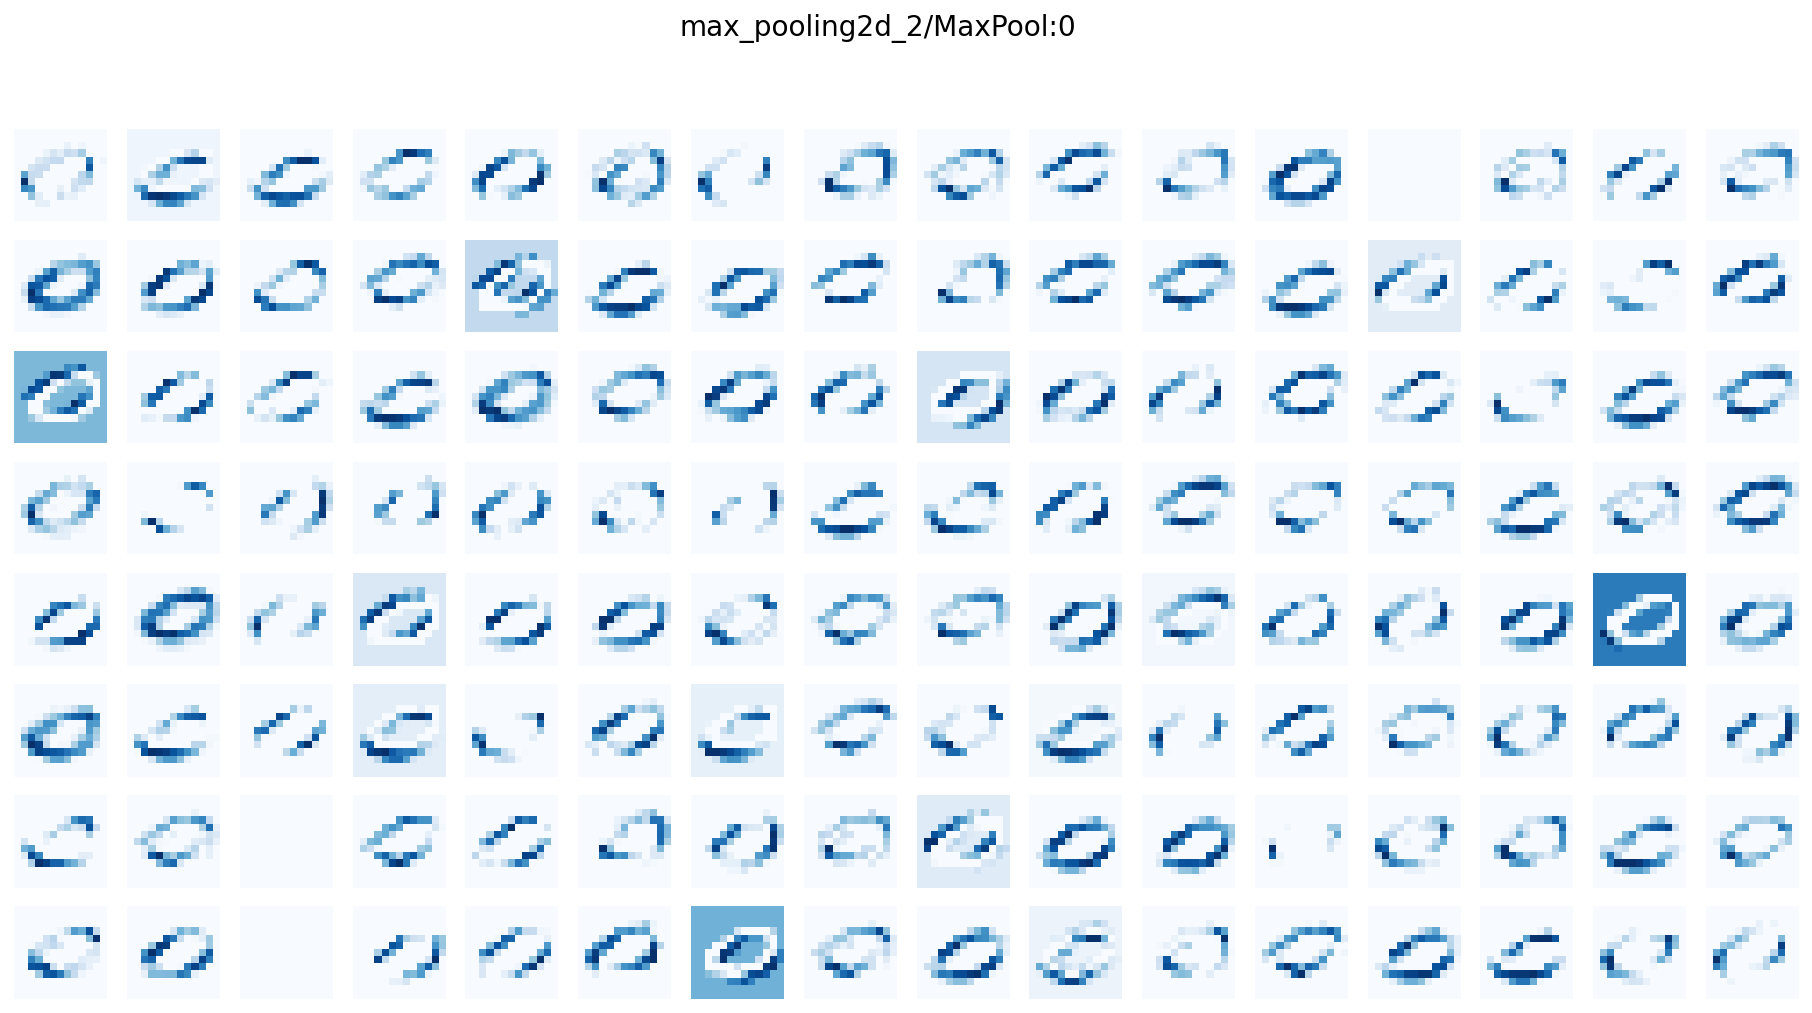

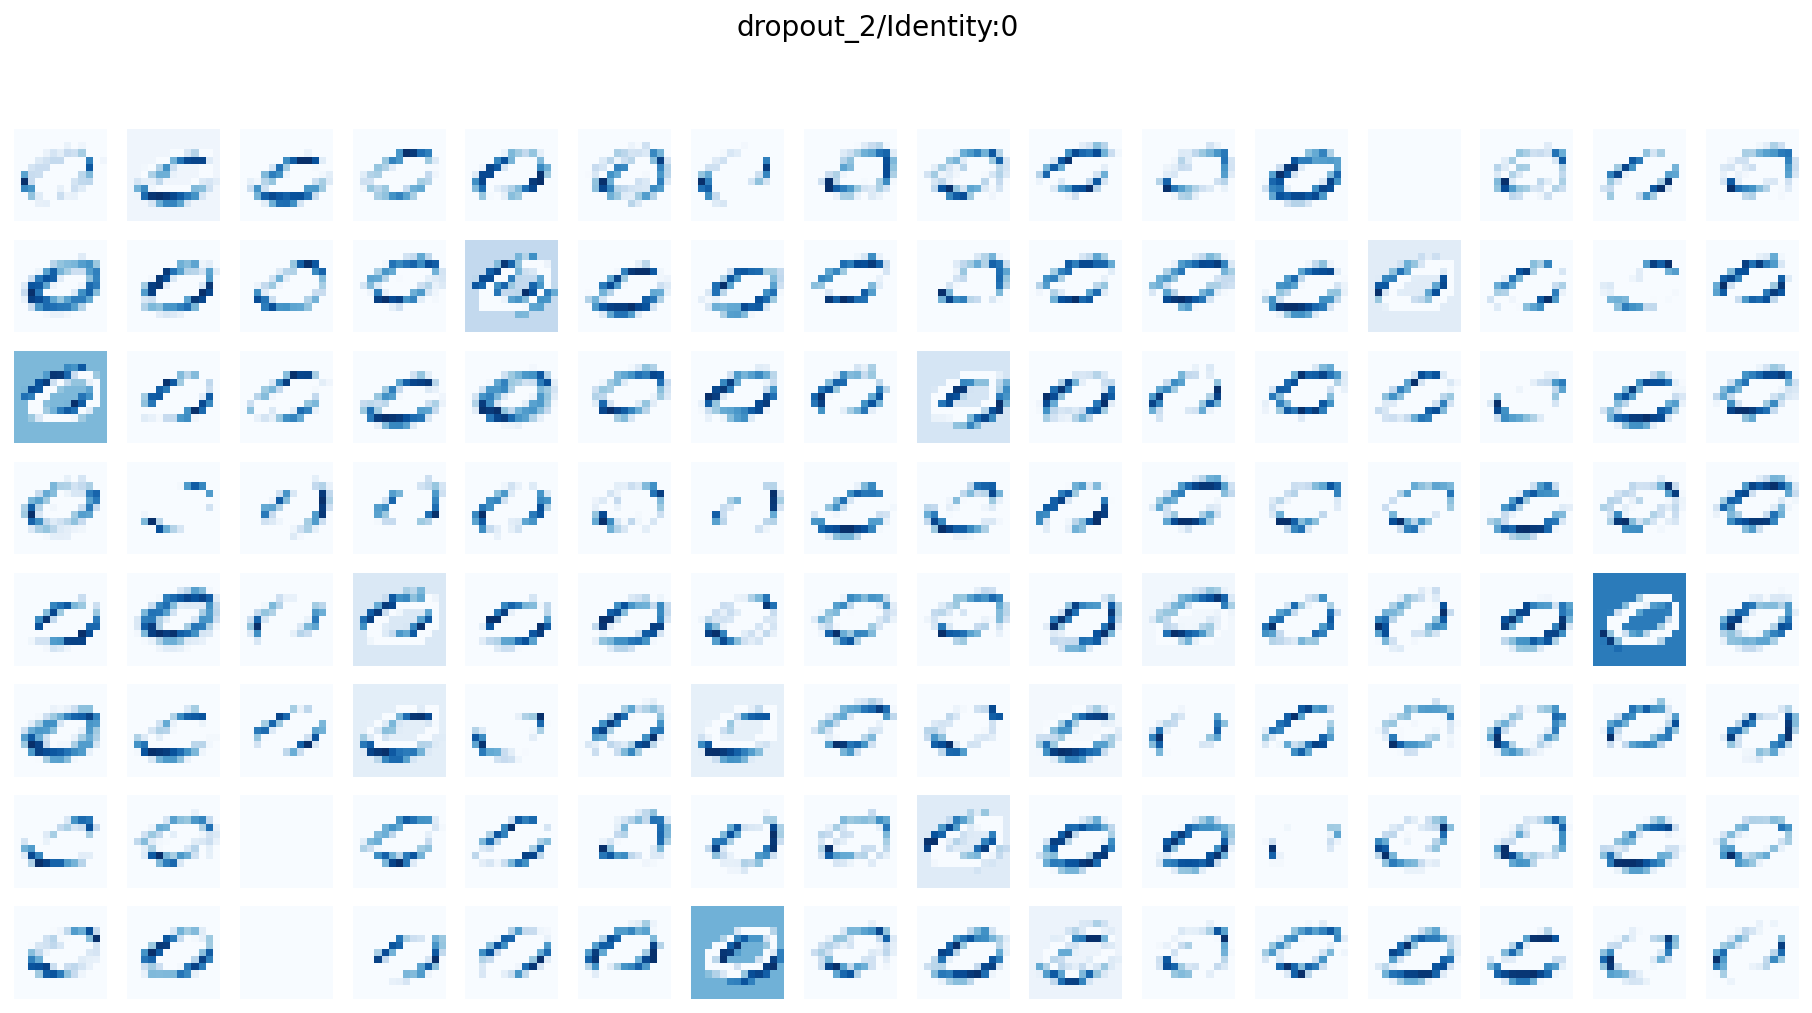

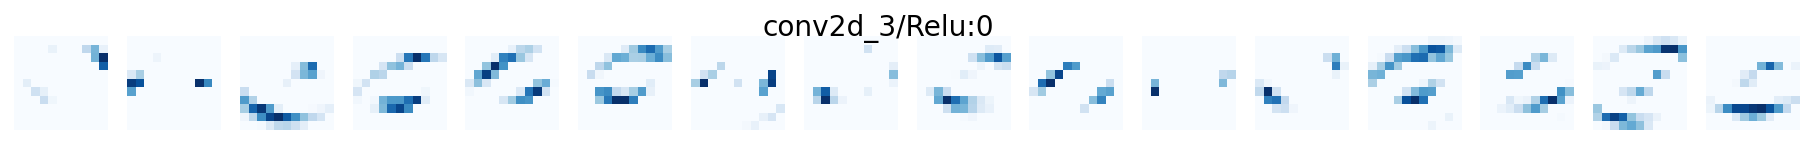

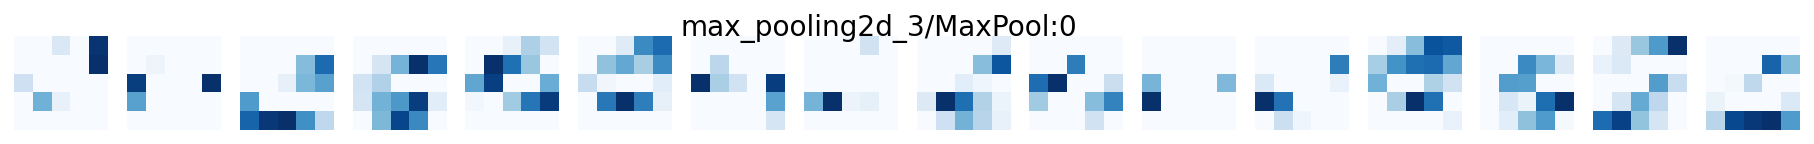

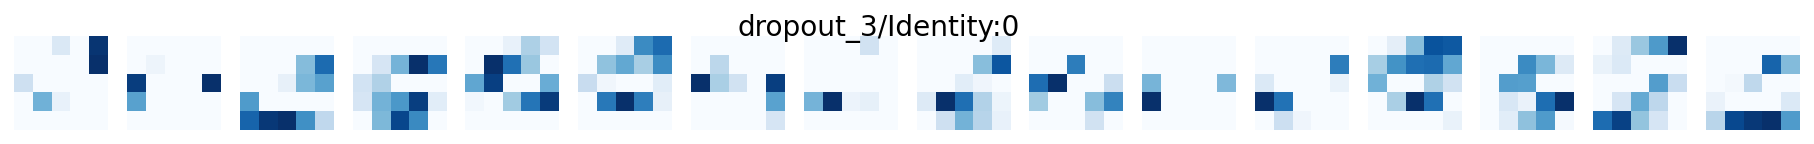

In [54]:
# instantiate hidden layer plot function
for i, layer in enumerate(activation_model.predict(X_train[9].reshape([1,28,28,1]))):
    plot_layer(layer, i, output_layers[i].name)

-------------------------

# Tuning

-------------------------------

# Model saving

In [55]:
# export model in h5 format
model.save('../models/model_v1.h5')

----------------------------

# Model testing demo

In [56]:
# import model
model = load_model('../models/model_v1.h5')

In [57]:
def classify(image):
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image).tolist()[0]
    return {str(i):prediction[i] for i in range(10)}

In [58]:
label = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(classify, 'sketchpad', label, capture_session=True,interpretation="default",title = 'Digit Classifier')

In [ ]:
interface.launch(debug=True, share=True)

----------------------------